# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = "dc86b5e3fb756a5ce632c9963d9ad225"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&units={units}&q={city}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        time.sleep(1)
        
        if city_weather['cod'] == 200: #will check if request was successful, had issues with pulling cities
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto baquerizo moreno
Processing Record 2 of Set 1 | pariaman
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | mundybash
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | lazaro cardenas
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | iskateley
Processing Record 11 of Set 1 | salinopolis
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | ron
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | taiohae
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | palmer
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | talcher
Processing Record 21 of Set 1 | villa huidobro
Processing R

Processing Record 44 of Set 4 | st. john's
Processing Record 45 of Set 4 | anatuya
Processing Record 46 of Set 4 | vilyuchinsk
Processing Record 47 of Set 4 | dapaong
Processing Record 48 of Set 4 | jeddah
Processing Record 49 of Set 4 | flying fish cove
Processing Record 0 of Set 5 | tazacorte
Processing Record 1 of Set 5 | at taj
Processing Record 2 of Set 5 | howard springs
Processing Record 3 of Set 5 | antalaha
Processing Record 4 of Set 5 | pimentel
Processing Record 5 of Set 5 | al hadd
Processing Record 6 of Set 5 | impfondo
Processing Record 7 of Set 5 | deder
Processing Record 8 of Set 5 | paracuru
Processing Record 9 of Set 5 | naze
Processing Record 10 of Set 5 | ulladulla
Processing Record 11 of Set 5 | acapulco de juarez
Processing Record 12 of Set 5 | apolinario saravia
Processing Record 13 of Set 5 | digapahandi
Processing Record 14 of Set 5 | ceelbuur
Processing Record 15 of Set 5 | gilgit
Processing Record 16 of Set 5 | palu
Processing Record 17 of Set 5 | hadibu
Proc

Processing Record 42 of Set 8 | talara
Processing Record 43 of Set 8 | angaur state
Processing Record 44 of Set 8 | loukhi
Processing Record 45 of Set 8 | ust'-kut
Processing Record 46 of Set 8 | bentiu
Processing Record 47 of Set 8 | linz
Processing Record 48 of Set 8 | allensbach
Processing Record 49 of Set 8 | laramie
Processing Record 0 of Set 9 | corumba
Processing Record 1 of Set 9 | dylym
Processing Record 2 of Set 9 | timbuktu
Processing Record 3 of Set 9 | kegen
Processing Record 4 of Set 9 | ankazoabo
Processing Record 5 of Set 9 | guiuan
Processing Record 6 of Set 9 | uzgen
Processing Record 7 of Set 9 | san patricio
Processing Record 8 of Set 9 | harper
Processing Record 9 of Set 9 | hola
Processing Record 10 of Set 9 | montepuez
Processing Record 11 of Set 9 | solleftea
Processing Record 12 of Set 9 | port lavaca
Processing Record 13 of Set 9 | kailua-kona
Processing Record 14 of Set 9 | liperi
Processing Record 15 of Set 9 | quellon
Processing Record 16 of Set 9 | tanjung

Processing Record 35 of Set 12 | dhari
Processing Record 36 of Set 12 | ouallam
Processing Record 37 of Set 12 | placido de castro
Processing Record 38 of Set 12 | polyarnyy
Processing Record 39 of Set 12 | tabas
Processing Record 40 of Set 12 | magadan
Processing Record 41 of Set 12 | cill airne
Processing Record 42 of Set 12 | moussoro
Processing Record 43 of Set 12 | nzerekore
Processing Record 44 of Set 12 | horodnye
Processing Record 45 of Set 12 | pudur
Processing Record 46 of Set 12 | calama
Processing Record 47 of Set 12 | jumla
Processing Record 48 of Set 12 | argo
Processing Record 49 of Set 12 | fort stockton
Processing Record 0 of Set 13 | lata
Processing Record 1 of Set 13 | blenheim
Processing Record 2 of Set 13 | male
Processing Record 3 of Set 13 | bumba
Processing Record 4 of Set 13 | tocopilla
Processing Record 5 of Set 13 | broken hill
Processing Record 6 of Set 13 | balnearia
Processing Record 7 of Set 13 | bamboo flat
Processing Record 8 of Set 13 | valdivia
Proces

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto baquerizo moreno,-0.9000,-89.6000,72.43,89,28,7.20,EC,1716856807
1,pariaman,-0.6190,100.1200,82.45,86,77,2.04,ID,1716856936
2,codrington,-38.2667,141.9667,63.21,40,5,14.18,AU,1716856937
3,grytviken,-54.2811,-36.5092,30.49,81,24,12.12,GS,1716856939
4,mundybash,53.2110,87.2983,51.26,97,100,6.40,RU,1716856940


In [18]:
city_data_df.to_csv("../output_data/cities.csv", index_label= "City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto baquerizo moreno,-0.9000,-89.6000,72.43,89,28,7.20,EC,1716856807
1,pariaman,-0.6190,100.1200,82.45,86,77,2.04,ID,1716856936
2,codrington,-38.2667,141.9667,63.21,40,5,14.18,AU,1716856937
3,grytviken,-54.2811,-36.5092,30.49,81,24,12.12,GS,1716856939
4,mundybash,53.2110,87.2983,51.26,97,100,6.40,RU,1716856940


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

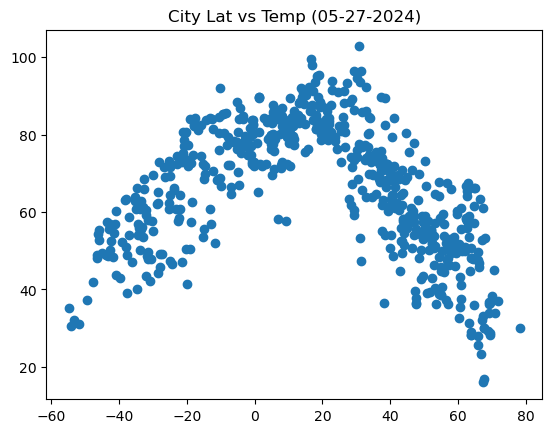

In [20]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    label = "Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Lat vs Temp (%s)" % time.strftime("%m-%d-%Y")) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

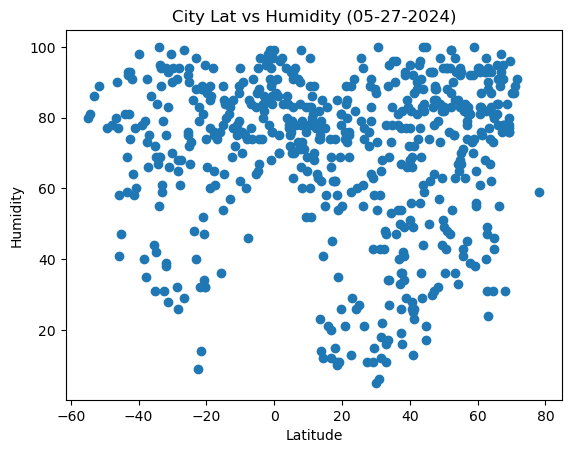

In [21]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    label = "Cities"
)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Lat vs Humidity (%s)" % time.strftime("%m-%d-%Y")) 
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

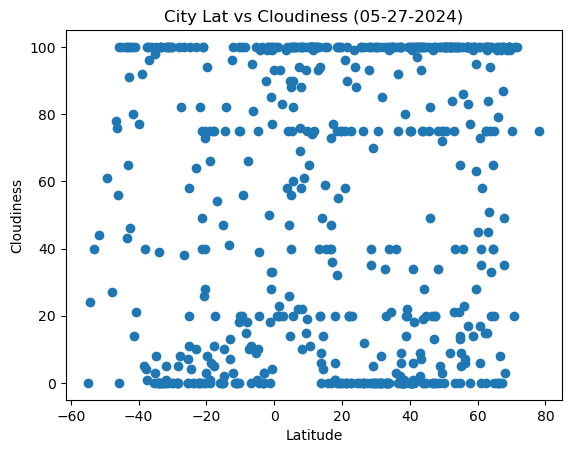

In [22]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    label = "Cities"
)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Lat vs Cloudiness (%s)" % time.strftime("%m-%d-%Y")) 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

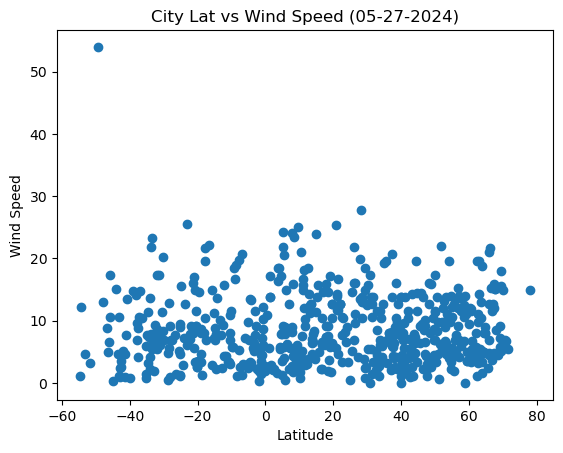

In [23]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    label = "Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Lat vs Wind Speed (%s)" % time.strftime("%m-%d-%Y")) 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, color ="green")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,mundybash,53.2110,87.2983,51.26,97,100,6.40,RU,1716856940
6,petropavlovsk-kamchatsky,53.0452,158.6483,50.59,75,75,8.95,RU,1716856942
7,lazaro cardenas,17.9583,-102.2000,81.57,62,1,7.31,MX,1716856943
9,iskateley,67.6803,53.1512,30.02,78,49,15.01,RU,1716856946
11,olonkinbyen,70.9221,-8.7187,34.03,89,100,6.78,SJ,1716856948


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto baquerizo moreno,-0.9000,-89.6000,72.43,89,28,7.20,EC,1716856807
1,pariaman,-0.6190,100.1200,82.45,86,77,2.04,ID,1716856936
2,codrington,-38.2667,141.9667,63.21,40,5,14.18,AU,1716856937
3,grytviken,-54.2811,-36.5092,30.49,81,24,12.12,GS,1716856939
5,port-aux-francais,-49.3500,70.2167,37.26,77,61,53.98,TF,1716856941


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6444600949363682


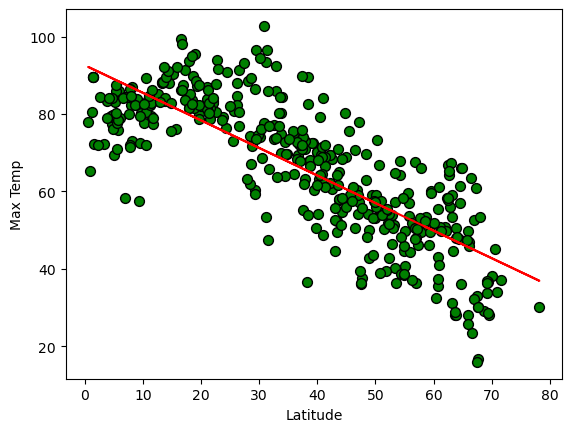

In [42]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10), "green")

The r-value is: 0.6047489069388992


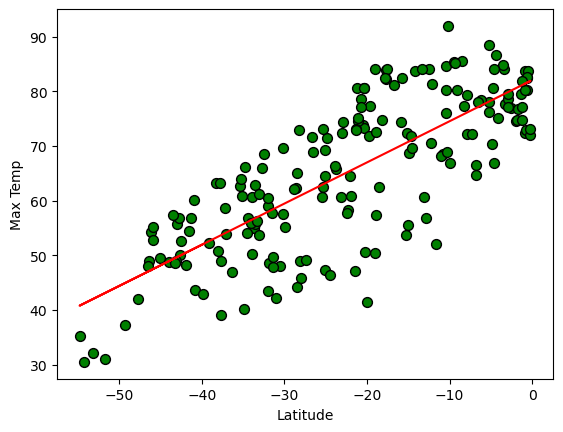

In [43]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,100), "green")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.005382080696008153


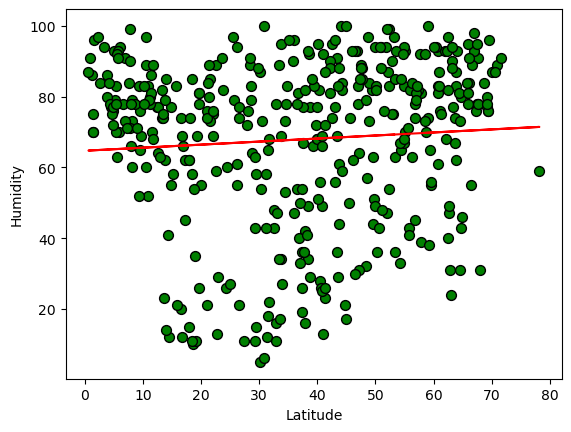

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (100, 30), "green")

The r-value is: 0.03621288404986163


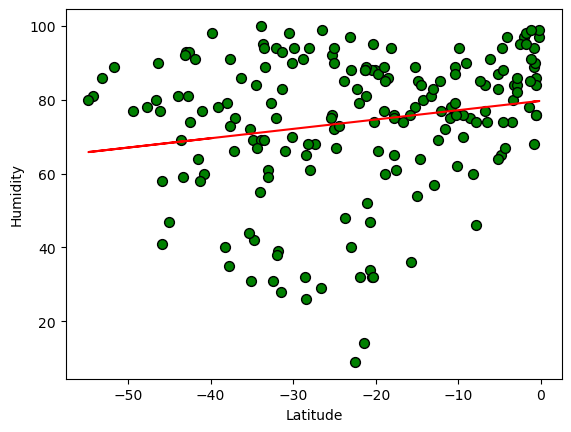

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (100,30), "green")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0008724175499810658


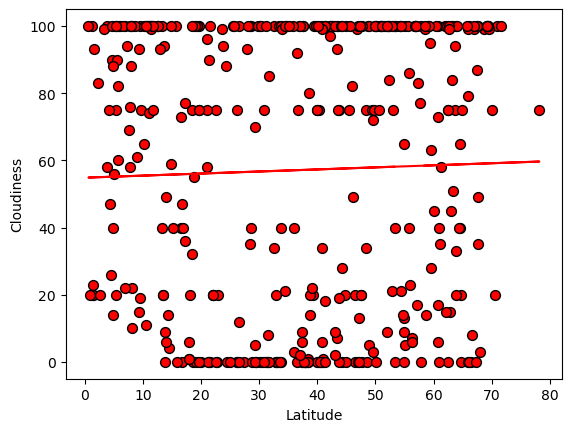

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (100, 30), "red")

The r-value is: 0.00259559675663252


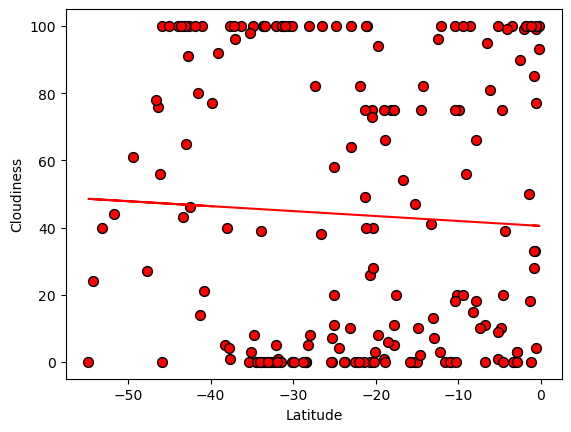

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (100,30), "red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0037595078559906504


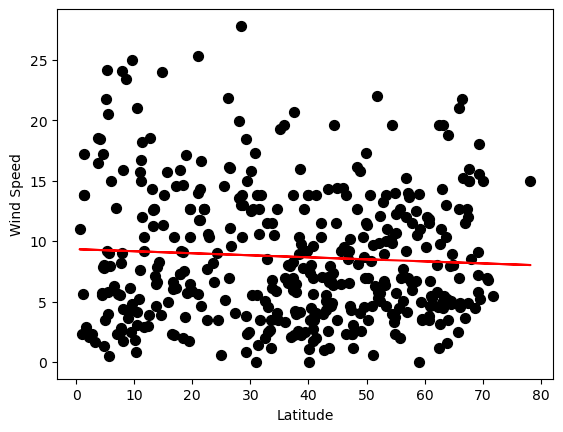

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (100, 30), "black")

The r-value is: 0.012605562088811176


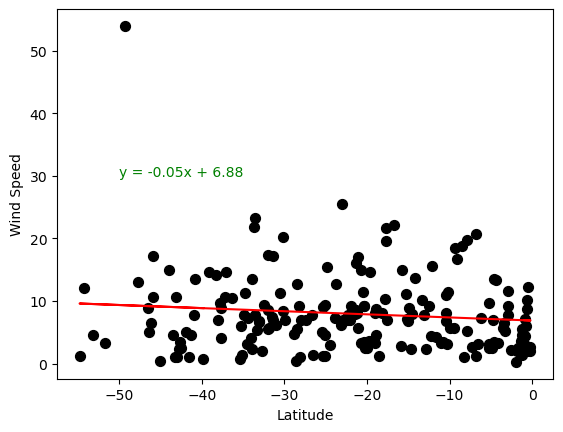

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed" , (-50,30), "black")

**Discussion about the linear relationship:** YOUR RESPONSE HERE